In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
nvm0_path = 'data/bfs/thread/com-friendster.ungraph_bfs_thread_nvm0'
nvm1_path = 'data/bfs/thread/com-friendster.ungraph_bfs_thread_nvm1'
ssd_path = 'data/bfs/thread/com-friendster.ungraph_bfs_thread_ssd'

output_path = 'plot/bfs/bfs_thread_friendster'

In [11]:
# Load nvm0
df = pd.read_csv( nvm0_path + '.csv')

# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()
# df = df.drop(['key'], axis=1).groupby(['name', 'type', 'thread']).sum().reset_index()
# index = df[ (df['thread'] > 64) ].index
# df.drop(index , inplace=True)


# df to array
nvm0 = df['time'].to_numpy()

thread = pd.unique(df['thread'])

x = list(range(len(thread)))
x_label = "# Concurrent I/O"

# Line 1
y1 = nvm0
y1_name = "CAVE-BFS (PCIe)"

df

,algo_name,thread,time
0,bfs_blocked_blocked,1,791.294475
1,bfs_blocked_blocked,2,430.985207
2,bfs_blocked_blocked,4,236.401520
3,bfs_blocked_blocked,8,124.017326
4,bfs_blocked_blocked,16,69.867202
5,bfs_blocked_blocked,32,47.676596
6,bfs_blocked_blocked,64,35.905183
7,bfs_blocked_blocked,128,30.494828
8,bfs_blocked_blocked,256,29.262274


In [12]:
# Load nvm1
df = pd.read_csv(nvm1_path + '.csv')

# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()

# df to array
nvm1 = df['time'].to_numpy()

# Line 2
y2 = nvm1
y2_name = "CAVE-BFS (Optane)"

df

,algo_name,thread,time
0,bfs_blocked_blocked,1,245.971359
1,bfs_blocked_blocked,2,147.707573
2,bfs_blocked_blocked,4,94.698159
3,bfs_blocked_blocked,8,71.953881
4,bfs_blocked_blocked,16,49.651896
5,bfs_blocked_blocked,32,37.778332
6,bfs_blocked_blocked,64,34.640440
7,bfs_blocked_blocked,128,35.747064
8,bfs_blocked_blocked,256,34.393815


In [13]:
# Load ssd
df = pd.read_csv(ssd_path + '.csv')

# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()

# df to array
ssd = df['time'].to_numpy()

# Line 2
y3 = ssd
y3_name = "CAVE-BFS (SATA)"

df

,algo_name,thread,time
0,bfs_blocked_blocked,1,988.698293
1,bfs_blocked_blocked,2,535.903784
2,bfs_blocked_blocked,4,298.750899
3,bfs_blocked_blocked,8,186.995888
4,bfs_blocked_blocked,16,138.082732
5,bfs_blocked_blocked,32,122.054065
6,bfs_blocked_blocked,64,121.173305
7,bfs_blocked_blocked,128,120.872078
8,bfs_blocked_blocked,256,122.737199


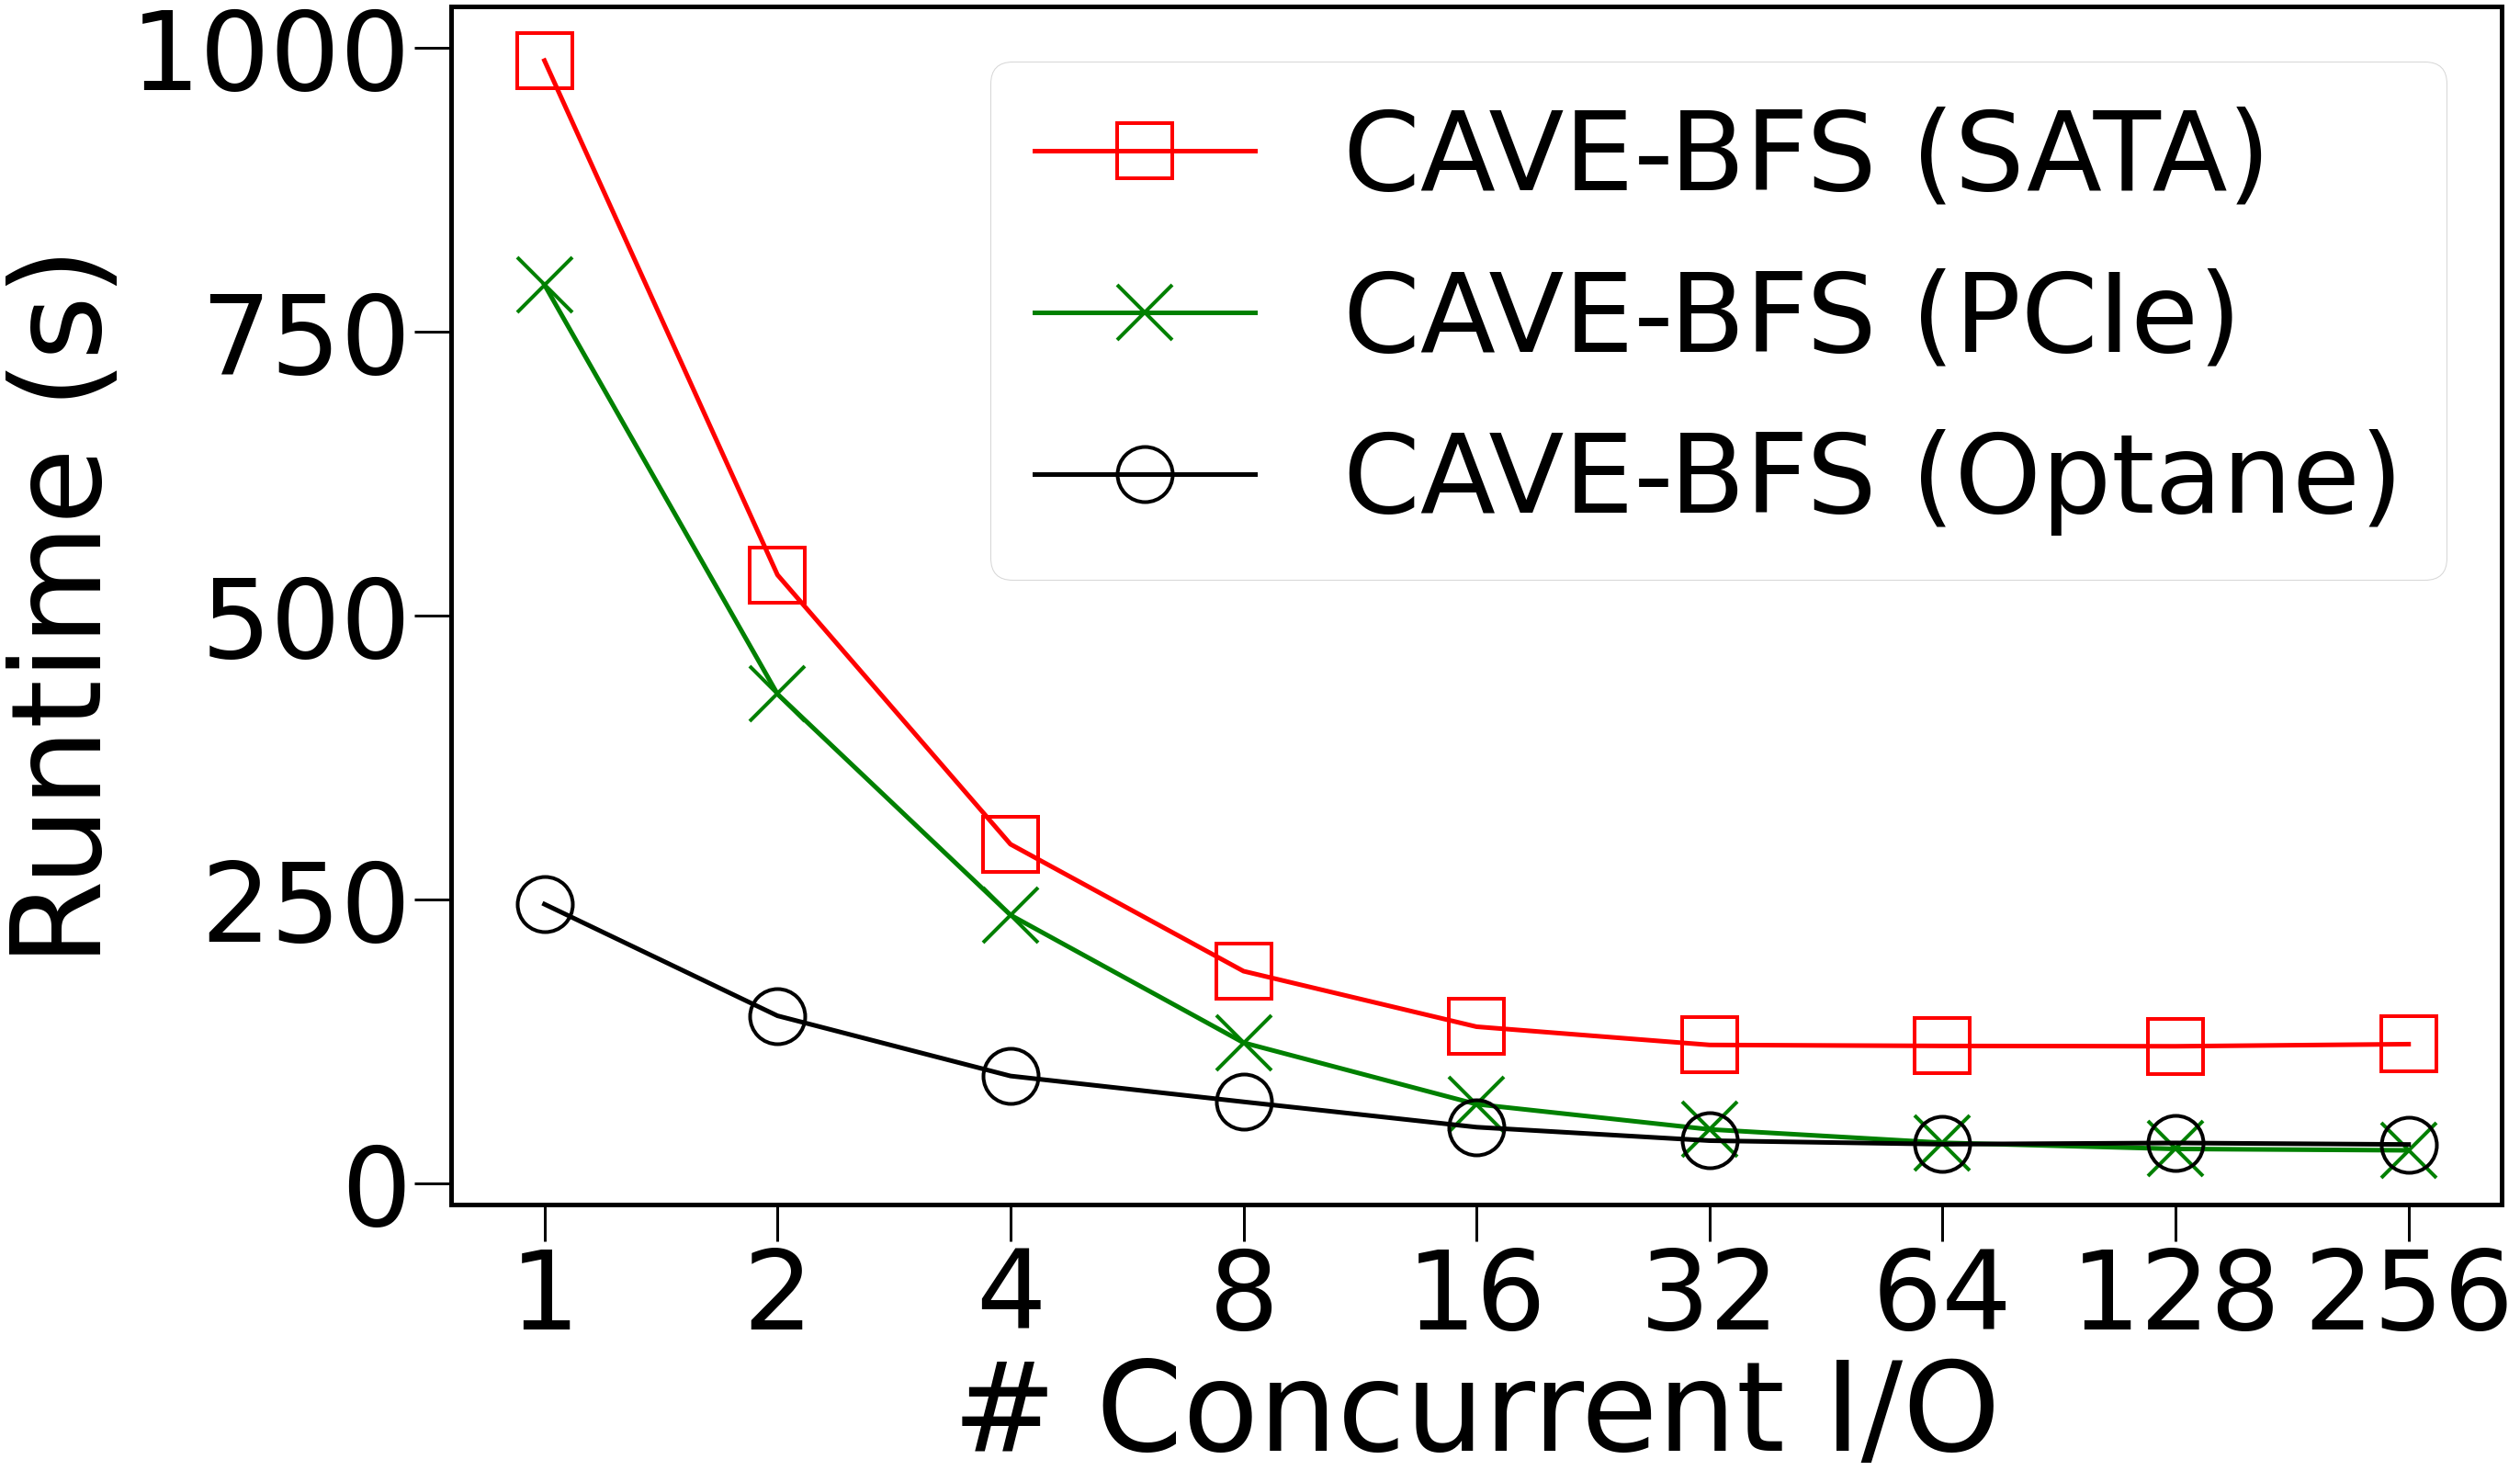

In [14]:
# Graph Settings
fig = plt.figure(figsize=(40,24))
# plt.title(title,fontsize=52)


y_label = "Runtime (s)"
    
plt.xlabel(x_label,fontsize=135)
plt.ylabel(y_label,fontsize=135)

plt.rc('xtick', labelsize = 120)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 120)    # fontsize of the tick labels
plt.rc('legend', fontsize = 120)    # legend fontsize
plt.rc('lines', linewidth = 5)     # line width
plt.rc('lines', markersize = 60)   # marker size
plt.rc('lines', markeredgewidth = 4)   # marker edge width
plt.rc('lines', markerfacecolor = 'none') 

plt.rcParams["axes.linewidth"] = 5    #Border width

plt.xticks(x,thread)
# plt.xticks(x,num_fsize)
# plt.yscale('log')
plt.tick_params(direction='out', length=40, width=3)    # Change tick size

# Plot lines
plt.plot(x, y3, marker='s', color='red', label=y3_name)
plt.plot(x, y1, marker='x', color='green', label=y1_name)
plt.plot(x, y2, marker='o', color='black', label=y2_name)


plt.legend()

plt.savefig(output_path +'.pdf', bbox_inches = "tight")

# If output front is small, rerun this cell